### **EXPERTISE TOOL: LINK TO THE FLOW CHART IS DOWN BELOW**

https://www.figma.com/file/4tJNBcGekShMgIIVxZ5QBz/Expertise-Tool-Flowchart-(Copy)?node-id=0%3A1

HOW TO RUN: 
1. Run each cell stage by stage starting from the top cell then continuing to the next cell ....
2.  User is required to provide input to the program at starting from the fourth cell of the note book and onwards.


*   NOTE: For simplicity purposes I have performed a sort on the clusterting so that the lower values of upvotes are in cluster 0 while the higher values of upvotes are in the latter clusters. Hence the first cluster can necessarily be associated with beginner expertise level while the latter clusters are ranging between intermidiate and advanced.
 

*   NOTE: The Last cell is designed as an infinte loop on purpose so that the usercan query the program as many times as needed by entering differet user_ids. To help the user select viable user_ids the program prints about 10 rows of data from the dataframe so the user can select one of the ids from the column **'owner_user_id'** inorder to test the script. 

In [1]:
# Ignore warnings because they crowd the notebook
import warnings
warnings.filterwarnings('ignore')

# Install the necessary third party packages
!pip install flatten_json
!pip install plot-likert
!pip install termcolor
!pip install matplotlib==3.4.0
!pip install inflect

#Import the necessary standard python packages
import pandas as pd
import requests
import time
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
from flatten_json import flatten
# Import the GaussianMixture class
from sklearn.mixture import GaussianMixture
import plot_likert
from termcolor import colored
import seaborn as sns
import inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def question_expertise_level():
    value_of_k = 0
    i = 0
    while i < 2:
        answer = input("Do you Know the Experise Level? (yes or no) ")
        if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']):
          # If yes we call the KMeans cluster method here
            value_of_k = int(answer)
            break

        elif any(answer.lower() == f for f in ['no', 'n', '0']):
          # if no we call the GMM Cluster Method here
            value_of_k = 2
            print(value_of_k)
            break
        else:
            i += 1
            if i < 2:
                print('Please enter yes or no')
            else:
                print("Nothing done")
    return value_of_k  

In [3]:
def plot_likert_custom(data, value_of_cluster):
  number = inflect.engine()
  string_value_of_cluster = number.number_to_words(0)
  # Replace the zeros
  for i in range(len(data)):
    # replace hardik with shardul
    if data[i] == 0:
        data[i] = string_value_of_cluster

  # assign base case to the scale
  another_scale = [string_value_of_cluster,1]
# Case by case basis
  if(value_of_cluster == 2):
    another_scale = [string_value_of_cluster,1]
  elif(value_of_cluster == 3):
    another_scale = [string_value_of_cluster,1,2]
  elif(value_of_cluster == 4):
    another_scale = [string_value_of_cluster,1,2,3]
  elif(value_of_cluster == 5):
    another_scale = [string_value_of_cluster,1,2,3,4]
  elif(value_of_cluster == 6):
    another_scale = [string_value_of_cluster,1,2,3,4,5]
  elif(value_of_cluster == 7):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6]
  elif(value_of_cluster == 8):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6,7]
  elif(value_of_cluster == 9):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6,7,8]
  elif(value_of_cluster == 10):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6,7,8,9]
  elif(value_of_cluster == 11):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6,7,8,9,10]
  elif(value_of_cluster == 12):
    another_scale = [string_value_of_cluster,1,2,3,4,5,6,7,8,9,10,11]
  try:
    plot_likert.plot_likert(data, another_scale, plot_percentage=True, bar_labels=True);
    print("Yay, everything worked!")
  except plot_likert.PlotLikertError as e:
    import sys
    # print("Oh no, something went wrong! The message in the exception is:\n" + str(e), file=sys.stderr)

def expertise_level(expertise_value, value_of_cluster):
  # assign base case to the scale
  scale_1 = ["Beginner", "Advanced"]
  scale_2 = ["Beginner","Intermidiate", "Advanced"]
  user_expertise = ""
# Case by case basis
  if(value_of_cluster == 2):
    if(expertise_value == 0):
      user_expertise = scale_1[0]
    elif(expertise_value == 1):
      user_expertise = scale_1[1]
  elif(value_of_cluster >= 3):
    if(expertise_value == 0):
      user_expertise = scale_2[0]
    elif(expertise_value == (value_of_cluster -1) ):
      user_expertise = scale_2[2]
    else:
      user_expertise = scale_2[1]
  return user_expertise


Do you know the number of dimensions of expertise you wish to consider? yes
Enter the dimensions of expertise as a comma separated list: Usage tensorflow,python tensorflow,python
How many users will be considered for comparison in the clustering: Note minimum is 100 users 300
Processed page 1, returned <Response [200]>
Processed page 2, returned <Response [200]>
Processed page 3, returned <Response [200]>
Do you have a defined number of expertise levels? (yes or no) yes
Please Enter the expertise levels 10


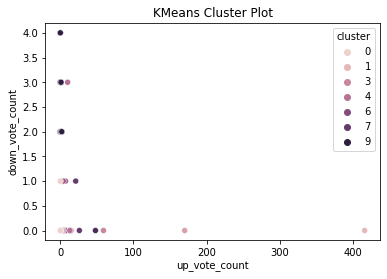




LIKERT SCALE
Yay, everything worked!


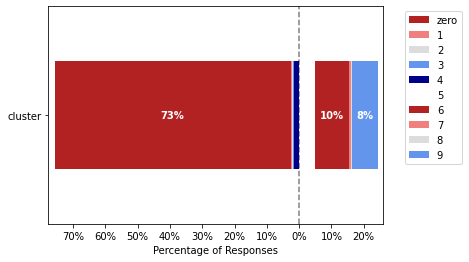

In [4]:

# Global variable for the cluster value for both the Kmeans and GMM Clustering
value_of_cluster = 0
#import the dataset for the TENSORFLOW tags from the STACKEXCHANGE API
hashtag_values = ""
answer =""
def query_stack_exchange():
  # Ask for the hashtag numbers
  number_of_hashtags = input("Do you know the number of dimensions of expertise you wish to consider? ")

  # Ask for the hashtag Values
  global hashtag_values
  hashtag_values = input("Enter the dimensions of expertise as a comma separated list: Usage tensorflow,python ")
  
  # Handle the number of users to consider clustering
  number_of_pages = input("How many users will be considered for comparison in the clustering: Note minimum is 100 users ")
  number_of_pages = int(number_of_pages)
  if(number_of_pages > 100):
    number_of_pages = (number_of_pages//100)
  else:
    #  number of pages being set to one is equivalent to 100 users
    number_of_pages = 1 

  complete_data=[]
  dfs = []
  for i in range (int(number_of_pages)):
    response = requests.get("https://api.stackexchange.com/2.3/search/advanced?order=desc&sort=activity&q=" + str(hashtag_values) + "&site=stackoverflow&filter=!*MZqiH2P51Zpclr2&pagesize=100&page=" + str(i + 1))
    newData =json.loads(response.text)
    for item in newData["items"]:
        complete_data.append(item)
        dfs.append(pd.DataFrame([item]))
    print("Processed page " + str(i + 1) + ", returned " + str(response))
    time.sleep(2) # timeout not to be rate-limited
  df = pd.concat(dfs, ignore_index=True, sort=False)
  dataStackexchange = df.to_csv('dataStackExchange.csv', encoding='utf-8', index=False)

  #import the dataset
  dataset_path = "dataStackExchange.csv"
  dataset = pd.read_csv(dataset_path)#, error_bad_lines=False)

  # which will ask the user if they know the expertise level or not
  global answer
  answer = input("Do you have a defined number of expertise levels? (yes or no) ")
  # If yes we call the KMeans cluster method here
  if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']): 
    global value_of_cluster 
    value_of_cluster = input("Please Enter the expertise levels ")
    value_of_cluster = int(value_of_cluster)
    # set_global_variable(value_of_cluster)

    # Fill missing values with mean column values in the data set
    dataset.fillna(dataset.mean(), inplace=True)
    # converting the type of downvote and upvote to int
    dataset = dataset.astype({"down_vote_count":"int","down_vote_count":"int"})

    #select the columns you wanna train your data with SET 2:[Upvotes, Downvotes]
    X = df.loc[:, ['down_vote_count', 'up_vote_count']].values
    # print(X)
  
    # KMEANS Clustering
    kmeans5 = KMeans(n_clusters = value_of_cluster, random_state=123).fit(X)
    # print(kmeans5.labels_)
    y_kmeans5 = kmeans5.fit_predict(X)

    # sort the Kmeans clustering so that the values are clustered from low to high value
    ord_idx = np.argsort(kmeans5.cluster_centers_.sum(axis=1))
    cntrs = np.zeros_like(y_kmeans5)
    for i in np.arange(value_of_cluster):
      cntrs[y_kmeans5==ord_idx[i]]=i

    dataset['cluster'] = y_kmeans5
    # print("THIS IS DATA SET CLUSTER::::" + dataset['cluster'].to_string(index=False))
    sns.scatterplot(data=dataset, y='down_vote_count', x='up_vote_count', hue = 'cluster').set(title='KMeans Cluster Plot')
    plt.show()
    # plt.legend()
    print('\n\n')
    # Now plot it using likert scale
    print(colored("LIKERT SCALE", 'green', attrs=['bold']))
    plot_likert_custom(dataset['cluster'], value_of_cluster)

   
  # if no we call the GMM Cluster Method here
  elif any(answer.lower() == f for f in ['no', 'n', '0']): 
    print(colored("That's okay!", 'green', attrs =['bold']))
    print(colored("We will help you pick the best cluster number using Gaussian Mixture Model(GMM) which is a clustering algorithm" , 'green', attrs =['bold']))
    # df = pd.read_csv('usersCombined_TF.csv')
    X = df.loc[:, ['down_vote_count', 'up_vote_count']].values
    
    # Set up a range of cluster numbers to try
    n_range = range(2,12)

    # Create empty lists to store the BIC and AIC values
    bic_score = []
    aic_score = []

    # Loop through the range and fit a model
    for n in n_range:
      gm = GaussianMixture(n_components=n, 
                          random_state=123, 
                         n_init=10)
      gm.fit(X)
      # Append the BIC and AIC to the respective lists
      bic_score.append(gm.bic(X))
      aic_score.append(gm.aic(X))
    # Plot the BIC and AIC values together
    fig, ax = plt.subplots(figsize=(8,6),nrows=1)
    ax.plot(n_range, bic_score, '-o', color='orange')
    ax.plot(n_range, aic_score, '-o', color='green')
    ax.set(xlabel='Number of Clusters', ylabel='Score')
    ax.set_xticks(n_range)
    ax.set_title('BIC and AIC Scores Per Number Of Clusters')
    plt.show()
    plt.close()
    

    print("HINT: CHOOSE THE MOST most appropriate cluster number by using the Cluster Value, after which the chart really levels off.")
    gmm_cluster_value = input("Enter the most appropriate cluster value based on the above chart values ")
    value_of_cluster = int(gmm_cluster_value)
    X = df.loc[:, ['down_vote_count', 'up_vote_count']].values
    gm = GaussianMixture(n_components= int(gmm_cluster_value), random_state=123, n_init=10)
    preds = gm.fit_predict(X)
    print(preds)
    dataset['cluster'] = preds

    #Plot GMM
    sns.scatterplot(data=dataset, y='down_vote_count', x='up_vote_count', hue = 'cluster').set(title='GMM Cluster Plot')
    print('\n\n')
    # Now plot it using likert scale
    print(colored("LIKERT SCALE", 'green', attrs=['bold']))
    plot_likert_custom(dataset['cluster'], value_of_cluster)
 
  return complete_data

# Call the function and store the result in a variable for the purposes of the next cell
newData_unflattned = query_stack_exchange()


In [5]:

# A function to query a users expertise with in the domains of the choosing of the user
def query_user_id():
  dfs = []
  count = 0
  for item in range(len(newData_unflattned)):
    newData_unflattned[count] = flatten(newData_unflattned[count])
    dfs.append(pd.DataFrame([newData_unflattned[count]]))
    count = count + 1
  df = pd.concat(dfs, ignore_index=True, sort=False)
  dataStackexchange = df.to_csv('dataStackExchange.csv', encoding='utf-8', index=False)
  #import the dataset for the 150 Elements
  dataset_path = "dataStackExchange.csv"
  dataset = pd.read_csv(dataset_path, index_col=False)#, error_bad_lines=False)
  # Fill missing values with mean column values in the data set
  dataset.fillna(dataset.mean(), inplace=True)
  # convert values to int
  dataset = dataset.astype({"owner_account_id":"int","owner_reputation":"int", "owner_user_id": "int"})
  #select the columns you wanna train your data with SET 2:[Upvotes, Downvotes]
  X = df.loc[:, ['down_vote_count', 'up_vote_count']].values

  if (answer == 'yes'):
    kmeans5 = KMeans(n_clusters = value_of_cluster)
    y_kmeans5 = kmeans5.fit_predict(X)
    dataset['cluster'] = y_kmeans5   
    print(dataset.iloc[: , :10])
    print(dataset.loc[: , ['cluster']])
    while(True):
      user_id = input("Enter the User ID of the user you wish to query for: ")
      if (dataset['owner_user_id'] == int(user_id)).any().any():
        dataset = dataset.drop_duplicates(subset=['owner_user_id'], keep='first')
        rslt_df = (dataset.loc[dataset['owner_user_id'] == int(user_id)])
        expertise_level_value = expertise_level(int(rslt_df.loc[:,'cluster']), value_of_cluster)
        print(colored("The user with the ID " + (rslt_df.loc[:,'owner_user_id']).to_string(index=False) + " and the Username " + (rslt_df.loc[:,'owner_display_name']).to_string(index=False) + " is in Cluster " + (rslt_df.loc[:,'cluster']).to_string(index=False), 'blue', attrs=['bold']) )
        print(colored("which means the expertise of the user in the domain " + str(hashtag_values) +  " is " + expertise_level_value , 'blue', attrs=['bold']))
      else: 
        print("Apologies! The User Id you have entered is not part of the Dataset.")
        print("Please try again by entering a different user id ")
  elif(answer =='no'):
     gm = GaussianMixture(n_components= int(value_of_cluster), random_state=0, n_init=10)
     preds = gm.fit_predict(X)
    #  print(preds)
     dataset['cluster'] = preds
     print(dataset.iloc[: , :10])
     print(dataset.loc[: , ['cluster']])
     while(True):
      user_id = input("Enter the User ID of the user you wish to query for: ")
      if (dataset['owner_user_id'] == int(user_id)).any().any():
        dataset = dataset.drop_duplicates(subset=['owner_user_id'], keep='first')
        rslt_df = (dataset.loc[dataset['owner_user_id'] == int(user_id)])
        expertise_level_value = expertise_level(int(rslt_df.loc[:,'cluster']), value_of_cluster)
        print(colored("The user with the ID " + (rslt_df.loc[:,'owner_user_id']).to_string(index=False) + " and the Username " + (rslt_df.loc[:,'owner_display_name']).to_string(index=False) + " is in Cluster " + (rslt_df.loc[:,'cluster']).to_string(index=False), 'blue', attrs=['bold']) )
        print(colored("which means the expertise of the user in the domain " + str(hashtag_values) +  " is " + expertise_level_value , 'blue', attrs=['bold']))
      else: 
        print("Apologies! The User Id you have entered is not part of the Dataset.")
        print("Please try again by entering a different user id ")
    

query_user_id()
# # Kmeans clustering

# # Output a percentage

         tags_0      tags_1            tags_2                  tags_3  \
0    tensorflow      import  jupyter-notebook             importerror   
1        python  tensorflow  machine-learning           deep-learning   
2        python  tensorflow             keras        jupyter-notebook   
3        python  tensorflow          grouping                     NaN   
4        python  tensorflow           pyspark                word2vec   
..          ...         ...               ...                     ...   
295      python  tensorflow          bayesian  tensorflow-probability   
296      python  tensorflow             keras       data-augmentation   
297      python  tensorflow     tensorflow2.0                     NaN   
298      python  tensorflow             flask        web-applications   
299      python  tensorflow  machine-learning                   keras   

                     tags_4  owner_account_id  owner_reputation  \
0                  apple-m1          25022009           

KeyboardInterrupt: ignored